In [1]:
# The code was removed by Watson Studio for sharing.

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190402162821-0004
KERNEL_ID = 7f1f325d-839d-459c-88a2-4bcd557d72ac


In [2]:
collisions.cache()

DataFrame[DATE: string, TIME: string, BOROUGH: string, ZIP CODE: string, LATITUDE: string, LONGITUDE: string, LOCATION: string, ON STREET NAME: string, CROSS STREET NAME: string, OFF STREET NAME: string, NUMBER OF PERSONS INJURED: string, NUMBER OF PERSONS KILLED: string, NUMBER OF PEDESTRIANS INJURED: string, NUMBER OF PEDESTRIANS KILLED: string, NUMBER OF CYCLIST INJURED: string, NUMBER OF CYCLIST KILLED: string, NUMBER OF MOTORIST INJURED: string, NUMBER OF MOTORIST KILLED: string, CONTRIBUTING FACTOR VEHICLE 1: string, CONTRIBUTING FACTOR VEHICLE 2: string, CONTRIBUTING FACTOR VEHICLE 3: string, CONTRIBUTING FACTOR VEHICLE 4: string, CONTRIBUTING FACTOR VEHICLE 5: string, UNIQUE KEY: string, VEHICLE TYPE CODE 1: string, VEHICLE TYPE CODE 2: string, VEHICLE TYPE CODE 3: string, VEHICLE TYPE CODE 4: string, VEHICLE TYPE CODE 5: string]

In [3]:
print("Records: {}".format(collisions.count()))
collisions.printSchema()

Records: 1463729
root
 |-- DATE: string (nullable = true)
 |-- TIME: string (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- ZIP CODE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- ON STREET NAME: string (nullable = true)
 |-- CROSS STREET NAME: string (nullable = true)
 |-- OFF STREET NAME: string (nullable = true)
 |-- NUMBER OF PERSONS INJURED: string (nullable = true)
 |-- NUMBER OF PERSONS KILLED: string (nullable = true)
 |-- NUMBER OF PEDESTRIANS INJURED: string (nullable = true)
 |-- NUMBER OF PEDESTRIANS KILLED: string (nullable = true)
 |-- NUMBER OF CYCLIST INJURED: string (nullable = true)
 |-- NUMBER OF CYCLIST KILLED: string (nullable = true)
 |-- NUMBER OF MOTORIST INJURED: string (nullable = true)
 |-- NUMBER OF MOTORIST KILLED: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 1: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 2: strin

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# matplotlib.patches allows us create colored patches, we can use for legends in plots
import matplotlib.patches as mpatches
# seaborn also builds on matplotlib and adds graphical features and new plot types
#adjust settings
%matplotlib inline
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 12)

In [5]:
collisions_df = collisions
collisions_pd = collisions_df[collisions_df['LATITUDE'] != 0][['LATITUDE', 'LONGITUDE', 'DATE', 'TIME',
                                                               'BOROUGH', 'ON STREET NAME', 'CROSS STREET NAME',
                                                               'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
                                                               'CONTRIBUTING FACTOR VEHICLE 1']].toPandas()

collisions_pd.columns = ['Latitude', 'Longitude', 'Date', 'Time', 'Borough', 'On Street',
                         'Cross Street', 'Persons Injured', 'Persons Killed', 'Contributing Factor']

collisions_pd['Latitude'] = collisions_pd['Latitude'].astype(float)
collisions_pd['Longitude'] = collisions_pd['Longitude'].astype(float)
collisions_pd['Persons Killed'] = collisions_pd['Persons Killed'].astype(float)
collisions_pd['Persons Injured'] = collisions_pd['Persons Injured'].astype(float)



#divide dataset in accidents which are: fatal, non-lethal but with person damage, non of the above
killed_pd = collisions_pd[collisions_pd['Persons Killed']!=0]
injured_pd = collisions_pd[np.logical_and(collisions_pd['Persons Injured']!=0, collisions_pd['Persons Killed']==0)]
nothing_pd = collisions_pd[np.logical_and(collisions_pd['Persons Killed']==0, collisions_pd['Persons Injured']==0)]

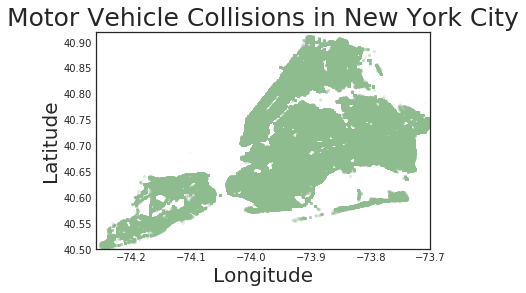

In [6]:
#create scatterplots
plt.scatter(collisions_pd.Longitude, collisions_pd.Latitude, alpha=0.05, s=4, color='darkseagreen')

#adjust more settings
plt.title('Motor Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

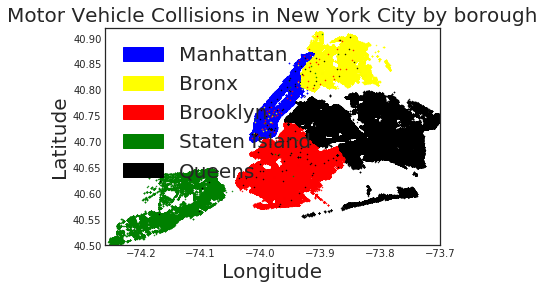

In [7]:
manhattan = collisions_pd[collisions_pd['Borough']=='MANHATTAN']
bronx = collisions_pd[collisions_pd['Borough']=='BRONX']
brooklyn = collisions_pd[collisions_pd['Borough']=='BROOKLYN']
staten = collisions_pd[collisions_pd['Borough']=='STATEN ISLAND']
queens = collisions_pd[collisions_pd['Borough']=='QUEENS']


#create scatterplots
plt.scatter(manhattan.Longitude, manhattan.Latitude, s=1, color='blue', marker ='.')
plt.scatter(bronx.Longitude, bronx.Latitude, s=1, color='yellow', marker ='.')
plt.scatter(brooklyn.Longitude, brooklyn.Latitude, color='red', s=1, marker ='.')
plt.scatter(staten.Longitude, staten.Latitude, s=1, color='green', marker ='.')
plt.scatter(queens.Longitude, queens.Latitude, s=1, color='black', marker ='.')

#create legend
blue_patch = mpatches.Patch(label='Manhattan', color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='Bronx')
red_patch = mpatches.Patch(color='red', label='Brooklyn')
green_patch = mpatches.Patch(color='green', label='Staten Island')
black_patch = mpatches.Patch(color='black', label='Queens')
plt.legend([blue_patch, yellow_patch, red_patch, green_patch, black_patch],
           ('Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'Queens'), 
           loc='upper left', prop={'size':20})

#adjust more settings
plt.title('Motor Vehicle Collisions in New York City by borough', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

Which neighborhoods have the highest total number of crashes? 

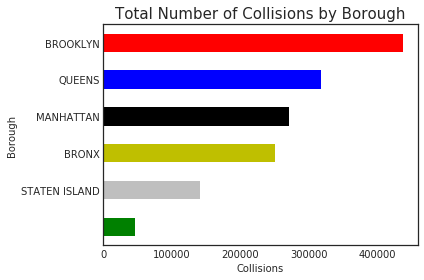

In [8]:
borough = collisions_df.groupBy('BOROUGH').count().sort('count').toPandas().iloc[1:,:]
borough['BOROUGH'] = [u'STATEN ISLAND', u'BRONX', u'MANHATTAN', u'QUEENS', u'BROOKLYN','None']

colors = ['g','0.75','y','k','b','r']
borough.sort_values(by='count', ascending=True)['count'].plot.barh(color=colors)
plt.xlabel('Collisions')
plt.ylabel('Borough')
plt.title('Total Number of Collisions by Borough', size=15)
plt.yticks(range(1,6),borough['BOROUGH'])
plt.tight_layout()
plt.show()

The bar graph clearly shows that the most collisions happen in Brooklyn and the least on Staten Island.

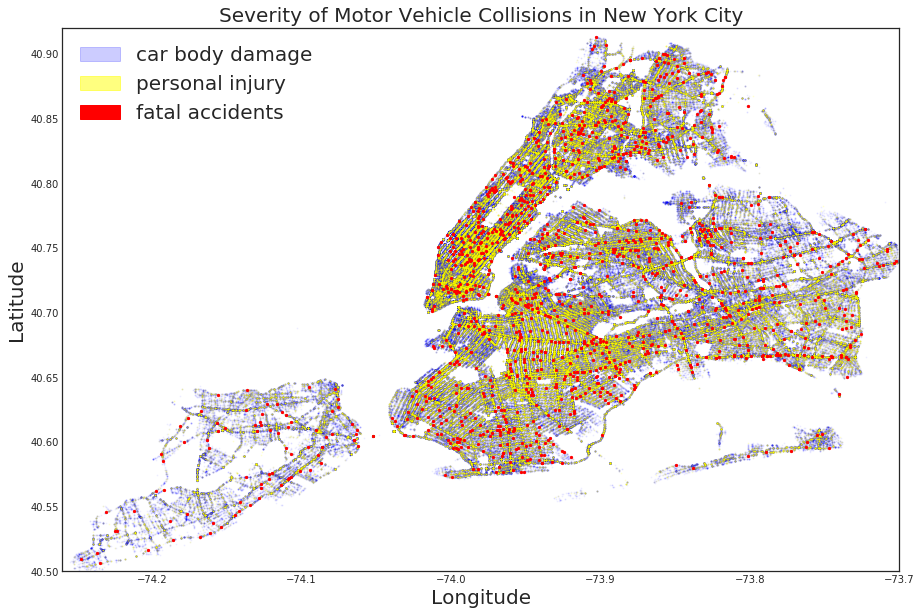

In [9]:
#adjust settings
plt.figure(figsize=(15,10))

#create scatterplots
plt.scatter(nothing_pd.Longitude, nothing_pd.Latitude, alpha=0.04, s=1, color='blue')
plt.scatter(injured_pd.Longitude, injured_pd.Latitude, alpha=0.1, s=1, color='yellow')
plt.scatter(killed_pd.Longitude, killed_pd.Latitude, color='red', s=5)

#create legend
blue_patch = mpatches.Patch( label='car body damage', alpha=0.2, color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='personal injury', alpha=0.5)
red_patch = mpatches.Patch(color='red', label='lethal accidents')
plt.legend([blue_patch, yellow_patch, red_patch],('car body damage', 'personal injury', 'fatal accidents'), 
           loc='upper left', prop={'size':20})

#adjust more settings
plt.title('Severity of Motor Vehicle Collisions in New York City', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.savefig('anothertry.png')

plt.show()

In [10]:
collisions_header_list = collisions.columns[:-4]
collisions_header_list.remove("CONTRIBUTING FACTOR VEHICLE 4")
collisions_header_list.remove("CONTRIBUTING FACTOR VEHICLE 3")
collisions_header_list.remove("CONTRIBUTING FACTOR VEHICLE 5")
collisions_df = collisions_df.dropna(how='any', subset=['ON STREET NAME', 'BOROUGH'])[collisions_header_list]
collisions_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868169 entries, 0 to 868168
Data columns (total 22 columns):
DATE                             868169 non-null object
TIME                             868169 non-null object
BOROUGH                          868169 non-null object
ZIP CODE                         868064 non-null object
LATITUDE                         845264 non-null object
LONGITUDE                        845264 non-null object
LOCATION                         845264 non-null object
ON STREET NAME                   868169 non-null object
CROSS STREET NAME                867763 non-null object
OFF STREET NAME                  205 non-null object
NUMBER OF PERSONS INJURED        868164 non-null object
NUMBER OF PERSONS KILLED         868159 non-null object
NUMBER OF PEDESTRIANS INJURED    868168 non-null object
NUMBER OF PEDESTRIANS KILLED     868168 non-null object
NUMBER OF CYCLIST INJURED        868169 non-null object
NUMBER OF CYCLIST KILLED         868169 non-null obj

### Spatial and temporal normalization by using Spark

To obtain a consistent representation of the spatial and temporal information about collisions, you have to normalize the data. Normalization is the process of organizing the columns (attributes) and tables (relations) to minimize data redundancy. This step will help you in future analyses.

In [11]:
delchars = ''.join(c for c in map(chr, range(256)) if not c.isalnum())
deltable = dict((ord(char), None) for char in delchars) # Python2 unicode
normalization_code = {
    'avenue':'av',
    'ave':'av',
    'avnue': 'av',
    'street': 'st',
    'road': 'rd',
    'boulevard': 'blvd',
    'place': 'pl',
    'plaza': 'pl',
    'square': 'sq',
    'drive': 'dr',
    'lane': 'ln',
    'parkway': 'pkwy',
    'turnpike': 'tp',
    'terrace': 'ter',
    '1st': '1',
    '2nd':'2',
    '3rd': '3',
    '1th': '1',
    '2th': '2',
    '3th': '3',
    '4th': '4',
    '5th': '5',
    '6th': '6',
    '7th': '7', 
    '8th': '8',
    '9th': '9',
    '0th': '0',
    'west ': 'w ',
    'north ': 'n ',
    'east ': 'e ',
    'south ': 's ',
}
def normalize_street(s):
    # Lowercase
    s = s.lower()

    # Delete all non-alphanumeric characters
    if isinstance(s, unicode):
        s = s.translate(deltable)
    else:
        s = s.translate(None, delchars) # Python 2

    # Replace common abbreviations
    for k in sorted(normalization_code.keys()):
        s = s.replace(k, normalization_code[k])

    # Only keep ascii chars
    s = s.encode('ascii', errors='ignore').decode()

    return s

def row_parser(row):
    from datetime import datetime
    
    """
    Spatial and Temporal Normalization
    Returns the location, borough, year, month, day, hour; removes nonalphanumeric characters
    """
    # create a row dictionary
    row_dict = row.asDict()
    
    # temporal
    ## date
    temp = row_dict['DATE']
    hr = row_dict['TIME'].split(":")[0]
    try:
        a = datetime.strptime(temp+" "+hr, '%m/%d/%Y %H')
        dates =  [a]
    except:
        a = datetime.now()
        dates = [a]
    
    # location and borough
    location = normalize_street(row_dict['ON STREET NAME'])
    borough = row_dict['BOROUGH'].lower()
    
    
    # other cols
    others = [row_dict[column] for column in collisions_header_list
             if column not in ["ON STREET NAME", "OFF STREET NAME", "CROSS STREET NAME", "BOROUGH", "DATE", "TIME"]]

       

    # return everything together
    return dates + [location] + [borough] + others


Now apply. 

In [12]:
from pyspark.sql import Row
collisions_out_row = Row(*(["Time", "Street", "Borough"] + [c for c in collisions_header_list
                      if c not in ["ON STREET NAME", "OFF STREET NAME", "CROSS STREET NAME", "BOROUGH", "DATE", "TIME"]]))
collisions_out_index = list(collisions_out_row)

print(collisions_out_row)


<Row(Time, Street, Borough, ZIP CODE, LATITUDE, LONGITUDE, LOCATION, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, UNIQUE KEY, VEHICLE TYPE CODE 1)>


In [13]:



collisions_out = collisions_df.rdd.map(
    lambda row: collisions_out_row(*(row_parser(row)))).toDF()


     CONTRIBUTING FACTOR VEHICLE 1   count
19               Oversized Vehicle    6132
18         Outside Car Distraction    6523
17             Physical Disability    7478
16             Alcohol Involvement    7700
15               Pavement Slippery    8162
14            Unsafe Lane Changing    9542
13             Passing Too Closely   11309
12             Driver Inexperience   12204
11         Prescription Medication   12722
10  Passing or Lane Usage Improper   13640
9      Traffic Control Disregarded   14620
8               Lost Consciousness   14968
7               Turning Improperly   22218
6            Following Too Closely   22644
5                  Fatigued/Drowsy   24940
4                 Backing Unsafely   27997
3                  Other Vehicular   29530
2    Failure to Yield Right-of-Way   55343
1   Driver Inattention/Distraction  138163
0                      Unspecified  378508


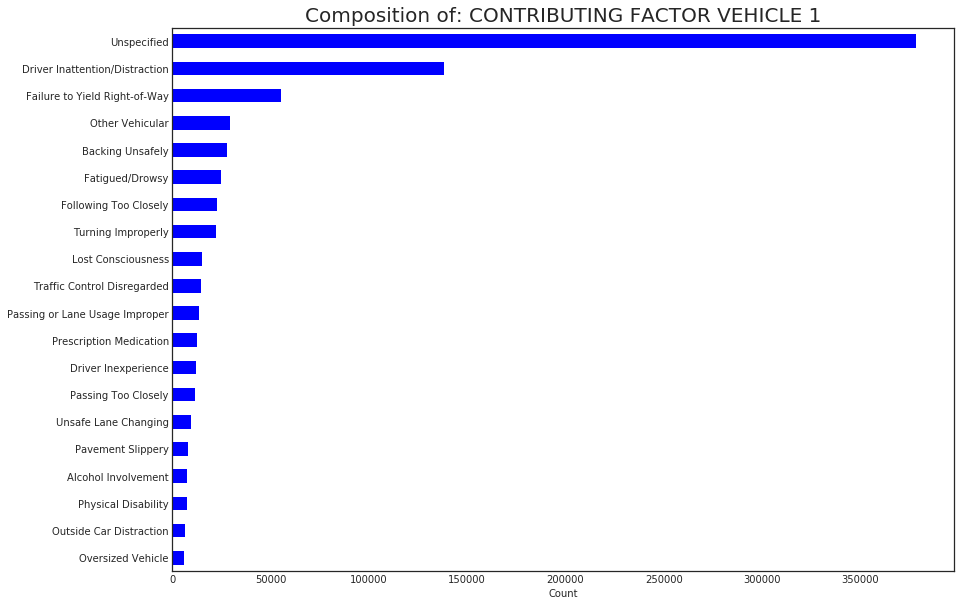

In [14]:
from pyspark.sql.functions import desc

collisions_out_df = collisions_out

factor = collisions_out_df.groupBy('CONTRIBUTING FACTOR VEHICLE 1').count().sort(desc('count')).toPandas()
factor = factor[0:20].sort_index(ascending=False)
print(factor)
factor.plot(kind='barh', legend=False, color='blue', figsize=(14,10))
plt.title('Composition of: ' + 'CONTRIBUTING FACTOR VEHICLE 1', size=20)
plt.xlabel('Count')
plt.yticks(range(len(factor))[::-1], factor['CONTRIBUTING FACTOR VEHICLE 1'][::-1])
plt.show()

Running the code cell above shows you that the contributing factor can't be specified in most cases. However, factors like distraction, failure to yield right-of-way, and fatigue could have an influence.

In [15]:
from collections import Counter

vehicletypecode, vehicletypecoderange = 'VEHICLE TYPE CODE ', range(1,6)
grouping = {
    'TAXI': 'Taxi',
    'AMBULANCE': 'Other',
    'BICYCLE': 'Other',
    'BUS': 'Bus',
    'FIRE TRUCK': 'Other', 
    'LARGE COM VEH(6 OR MORE TIRES)': 'Truck',
    'LIVERY VEHICLE': 'Truck',
    'MOTORCYCLE': 'Other', 
    'OTHER': 'Other',
    'PASSENGER VEHICLE': 'Auto',
    'PICK-UP TRUCK': 'Other',
    'PEDICAB': 'Other', 
    'SCOOTER': 'Other',
    'SMALL COM VEH(4 TIRES) ': 'Truck',
    'SPORT UTILITY / STATION WAGON': 'Auto', 
    'UNKNOWN': 'Other',
    'VAN': 'Auto',
    'UNSPECIFIED': 'Other',
    None: None
}
#print(collisions_out)
collisions_out_categories = collisions_out.rdd.map(lambda row:
                   collisions_out_row(*[row[i] for i in range(len(row))])
                  ).toDF()
print(collisions_out_categories)
print(collisions_out)

DataFrame[Time: timestamp, Street: string, Borough: string, ZIP CODE: string, LATITUDE: string, LONGITUDE: string, LOCATION: string, NUMBER OF PERSONS INJURED: string, NUMBER OF PERSONS KILLED: string, NUMBER OF PEDESTRIANS INJURED: string, NUMBER OF PEDESTRIANS KILLED: string, NUMBER OF CYCLIST INJURED: string, NUMBER OF CYCLIST KILLED: string, NUMBER OF MOTORIST INJURED: string, NUMBER OF MOTORIST KILLED: string, CONTRIBUTING FACTOR VEHICLE 1: string, CONTRIBUTING FACTOR VEHICLE 2: string, UNIQUE KEY: string, VEHICLE TYPE CODE 1: string]
DataFrame[Time: timestamp, Street: string, Borough: string, ZIP CODE: string, LATITUDE: string, LONGITUDE: string, LOCATION: string, NUMBER OF PERSONS INJURED: string, NUMBER OF PERSONS KILLED: string, NUMBER OF PEDESTRIANS INJURED: string, NUMBER OF PEDESTRIANS KILLED: string, NUMBER OF CYCLIST INJURED: string, NUMBER OF CYCLIST KILLED: string, NUMBER OF MOTORIST INJURED: string, NUMBER OF MOTORIST KILLED: string, CONTRIBUTING FACTOR VEHICLE 1: stri

In [29]:
collisions_transformed_row = Row(*(["Time", "Street", "Borough", "Injured",
                                                "Killed", "Auto", "Bus",
                                                "Truck", "Taxi", "Other", ]))

def transform_involved(row):
    counts = Counter([row[i] for i in range(len(row)) if collisions_out_index[i].startswith("VEHICLE TYPE CODE")])
    return collisions_transformed_row(*([row.asDict()[c] for c in ["Time", "Street", "Borough",
                                                                      "NUMBER OF PERSONS INJURED",
                                                                      "NUMBER OF PERSONS KILLED"]] + 
                                       [counts[x] if x in counts else 0
                                           for x in ['Auto', 'Bus','Truck', 'Taxi', 'Other']]))

collisions_transformed = collisions_out_categories.rdd.map(transform_involved).toDF()
print(collisions_transformed)

DataFrame[Time: timestamp, Street: string, Borough: string, Injured: string, Killed: string, Auto: bigint, Bus: bigint, Truck: bigint, Taxi: bigint, Other: bigint]


In [30]:
collisions_transformed_boolean_row = Row(*(["Time", "Street", "Borough",
                                                        "AccidentsWithInjuries",
                                                        "AccidentswithDeaths", "Auto", "Bus",
                                                        "Truck", "Taxi", "Other",
                                                        "Injured", "Killed"]))

collisions_transformed_boolean = collisions_transformed.rdd.map(
    lambda row: collisions_transformed_boolean_row(*([int(row.asDict()[c] > 0) if c in ["Injured",
                                                "Killed"] else row.asDict()[c]
                                                      for c in list(collisions_transformed_row)] + 
                                                    [row.Injured, row.Killed])))

In [31]:
collisions_transformed_boolean.take(1)

[Row(Time=datetime.datetime(2019, 3, 19, 0, 0), Street=u'avz', Borough=u'brooklyn', AccidentsWithInjuries=1, AccidentswithDeaths=1, Auto=0, Bus=0, Truck=0, Taxi=0, Other=0, Injured=u'0', Killed=u'0')]

In [32]:
aggregation_columns = {x:"sum" for x in ["AccidentsWithInjuries", "AccidentswithDeaths",
                                    "Auto", "Bus", "Truck", "Taxi", "Other", "Injured", "Killed"]}
aggregation_columns.update({"*":"count"})

collisions_grouped = collisions_transformed_boolean.toDF().groupBy(
    "Time", "Street", "Borough").agg(aggregation_columns)

# rename columns names
for c in collisions_grouped.columns:
    if c.startswith("sum") or c.startswith("SUM"):
        collisions_grouped = collisions_grouped.withColumnRenamed(c, c[4:-1])
    elif c.startswith("count") or c.startswith("COUNT"):
        collisions_grouped = collisions_grouped.withColumnRenamed(c, "NumberOfAccidents")

In [33]:
collisions_grouped.take(1)

[Row(Time=datetime.datetime(2016, 6, 29, 12, 0), Street=u'west96st', Borough=u'manhattan', Other=0, NumberOfAccidents=1, Killed=0.0, Auto=0, Injured=0.0, AccidentswithDeaths=1, Taxi=0, AccidentsWithInjuries=1, Truck=0, Bus=0)]

In [34]:
collisions_final_row = pyspark.sql.Row(*(["Year", "Month", "Day", "Hour"] + collisions_grouped.columns[1:]))
collisions_final = collisions_grouped.rdd.map(lambda row: collisions_final_row(*([row.Time.year, row.Time.month,
                                                                              row.Time.day, row.Time.hour] +
                                                                             [row.asDict()[x]
                                                                              for x in collisions_final_row[4:]]))).toDF()

In [35]:
collisions_final.take(1)

[Row(Year=2016, Month=6, Day=29, Hour=12, Street=u'west96st', Borough=u'manhattan', Other=0, NumberOfAccidents=1, Killed=0.0, Auto=0, Injured=0.0, AccidentswithDeaths=1, Taxi=0, AccidentsWithInjuries=1, Truck=0, Bus=0)]

### Determine the streets with the most collisions

Find the top ten streets in New York where the most vehicle collisions occurred. Display the results in a bar graph and as a scatter plot (ignore any deprecation warnings):

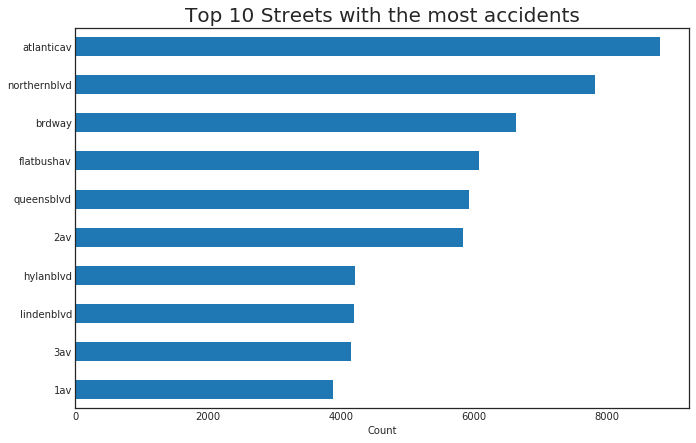

In [36]:
from pyspark.sql import functions as F
collisions_final_df = collisions_final
plottingdf = collisions_final_df.groupBy("Borough", "Street").agg(F.sum("NumberOfAccidents").alias("sum(NumberOfAccidents)")).\
sort(F.desc('sum(NumberOfAccidents)')).limit(10).toPandas()
plottingdf[['sum(NumberOfAccidents)']].plot(kind='barh', figsize=(11,7), legend=False)
plt.title('Top 10 Streets with the most accidents', size=20)
plt.xlabel('Count')
plt.yticks(range(10), plottingdf['Street'])
plt.gca().invert_yaxis()
plt.show()

Now you can add the information about the top 10 streets into the scatter plot.

In [ ]:
data1 = collisions_out_df[['Borough', 'Street', 'LATITUDE', 'LONGITUDE']].toPandas()

collisions1 = data1[np.logical_and(data1['Street']=='atlanticav', data1['Borough']=='brooklyn')]
collisions2 = data1[np.logical_and(data1['Street']=='northernblvd', data1['Borough']=='queens')]
collisions3 = data1[np.logical_and(data1['Street']=='brdway', data1['Borough']=='manhattan')]
collisions4 = data1[np.logical_and(data1['Street']=='flatbushav', data1['Borough']=='brooklyn')]
collisions5 = data1[np.logical_and(data1['Street']=='queensblvd', data1['Borough']=='queens')]
collisions6 = data1[np.logical_and(data1['Street']=='2av', data1['Borough']=='manhattan')]
collisions7 = data1[np.logical_and(data1['Street']=='hylanblvd', data1['Borough']=='staten island')]
collisions8 = data1[np.logical_and(data1['Street']=='nostrandav', data1['Borough']=='brooklyn')]
collisions9 = data1[np.logical_and(data1['Street']=='lindenblvd', data1['Borough']=='brooklyn')]
collisions10 = data1[np.logical_and(data1['Street']=='bedfordav', data1['Borough']=='brooklyn')]

#create scatterplots
plt.scatter(data1.LONGITUDE, data1.LATITUDE, s=1, color='darkseagreen')
plt.scatter(collisions1.LONGITUDE, collisions1.LATITUDE, s=2, color='red')
plt.scatter(collisions2.LONGITUDE, collisions2.LATITUDE, color='blue', s=2)
plt.scatter(collisions3.LONGITUDE, collisions3.LATITUDE, s=2, color='magenta')
plt.scatter(collisions4.LONGITUDE, collisions4.LATITUDE, color='orange', s=2)
plt.scatter(collisions5.LONGITUDE, collisions5.LATITUDE, s=2, color='yellow')
plt.scatter(collisions6.LONGITUDE, collisions6.LATITUDE, color='purple', s=2)
plt.scatter(collisions7.LONGITUDE, collisions7.LATITUDE, s=2, color='black')
plt.scatter(collisions8.LONGITUDE, collisions8.LATITUDE, color='chartreuse', s=2)
plt.scatter(collisions9.LONGITUDE, collisions9.LATITUDE, s=2, color='brown')
plt.scatter(collisions10.LONGITUDE, collisions10.LATITUDE, color='darkgreen', s=2)


#create legend
a_patch = mpatches.Patch(color='red', label='Atlantic Avenue')
b_patch = mpatches.Patch(color='blue', label='Northern Boulevard')
c_patch = mpatches.Patch(color='magenta', label='Broadway')
d_patch = mpatches.Patch(color='orange', label='Flatbush Avenue')
e_patch = mpatches.Patch(color='yellow', label='Queens Boulevard')
f_patch = mpatches.Patch(color='purple', label='2nd Avenue')
g_patch = mpatches.Patch(color='black', label='Hylan Boulevard')
h_patch = mpatches.Patch(color='chartreuse', label='Nostrand Avenue')
i_patch = mpatches.Patch(color='brown', label='Linden Boulevard')
j_patch = mpatches.Patch(color='darkgreen', label='Bedford Avenue')

plt.legend([a_patch, b_patch, c_patch, d_patch, e_patch, f_patch, g_patch, h_patch, i_patch, j_patch],
           ('Atlantic Avenue', 'Northern Boulevard', 'Broadway', 'Flatbush Avenue', 'Queens Boulevard', '2nd Avenue',
            'Hylan Boulevard', 'Nostrand Avenue', 'Linden Boulevard', 'Bedford Avenue'), 
           loc='upper left', prop={'size':20})

#adjust more settings
plt.title('Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

### Determining when the most collisions occurred

Now find out at what time of the day the most accidents occurred and see if you can detect any interesting patterns by running the following cell:

In [ ]:
from pyspark.sql import functions as F

hourplot = collisions_final_df[['Bus','Truck','Taxi','Other','Hour','Auto']].groupBy('Hour')\
.agg(F.sum("Bus").alias("Bus"), F.sum("Truck").alias("Truck"), F.sum("Taxi").alias("Taxi"),\
F.sum("Other").alias("Other"),F.sum("Auto").alias("Auto")).toPandas()

hourplot[['Bus', 'Truck', 'Taxi', 'Auto']].plot(stacked=True, kind='bar',figsize=(12,8), alpha=1)
#'SUM(Other)',
plt.xlabel('Hour', size=17)
plt.ylabel('Vehicles', size=17)
plt.legend(loc='best', prop={'size':20}, framealpha=0) 
plt.title('Collisions on Road per Hour', size=25)
plt.show()

This plot shows collisions spread across a day, with peaks during the morning and afternoon rush hours. You can see that significantly more collisions occurred during the afternoon rush hour than during the morning rush hour. Also, the most collisions involve cars by far, while buses, taxis, and trucks are involved in accidents a lot less frequently.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>